# Data Science Project: TBD

**Author**: Samer Eladad

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns
import tkinter as tk
from tkinter import Label, messagebox
from PIL import Image, ImageTk

In [42]:
# Clean combined movies dataset
movies_clean_path = '/Users/samer/Documents/github_repos/Cinemalytics/data/clean/updated_clean_combined_movies.csv'
movies_clean_df = pd.read_csv(movies_clean_path)

# Clean combined series dataset
series_clean_path = '/Users/samer/Documents/github_repos/Cinemalytics/data/clean/clean_combined_series.csv'
series_clean_df = pd.read_csv(series_clean_path)

# Separate movie DataFrames by platform and content type
netflix_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Netflix']
prime_video_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Prime Video']
disney_plus_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Disney+']

# Separate series DataFrames by platform and content type
netflix_series_df = series_clean_df[series_clean_df['platform'] == 'Netflix']
prime_video_series_df = series_clean_df[series_clean_df['platform'] == 'Prime Video']
disney_plus_series_df = series_clean_df[series_clean_df['platform'] == 'Disney+']

In [43]:
# Display Clean Movies dataset column names
print("\nClean Combined Movies dataset column names:")
print(movies_clean_df.columns.tolist())


Clean Combined Movies dataset column names:
['title', 'age_rating', 'duration_min', 'genre', 'budget', 'revenue', 'platform']


In [44]:
'''
# Display Clean Series dataset column names
print("\nClean Combined Series dataset column names:")
print(series_clean_df.columns.tolist())
'''

'\n# Display Clean Series dataset column names\nprint("\nClean Combined Series dataset column names:")\nprint(series_clean_df.columns.tolist())\n'

In [45]:
# Explode the movie 'genre' column for each platform
netflix_movies_df = netflix_movies_df.assign(genre=netflix_movies_df['genre'].str.split(', ')).explode('genre')
prime_video_movies_df = prime_video_movies_df.assign(genre=prime_video_movies_df['genre'].str.split(', ')).explode('genre')
disney_plus_movies_df = disney_plus_movies_df.assign(genre=disney_plus_movies_df['genre'].str.split(', ')).explode('genre')

# Count the number of movies by genre
netflix_movies_genre_counts = netflix_movies_df['genre'].value_counts()
prime_video_movies_genre_counts = prime_video_movies_df['genre'].value_counts()
disney_plus_movies_genre_counts = disney_plus_movies_df['genre'].value_counts()

'''
# Explode the series 'genre' column for each platform
netflix_series_df = netflix_series_df.assign(genre=netflix_series_df['genre'].str.split(', ')).explode('genre')
prime_video_series_df = prime_video_series_df.assign(genre=prime_video_series_df['genre'].str.split(', ')).explode('genre')
disney_plus_series_df = disney_plus_series_df.assign(genre=disney_plus_series_df['genre'].str.split(', ')).explode('genre')

# Count the number of series by genre
netflix_series_genre_counts = netflix_series_df['genre'].value_counts()
prime_video_series_genre_counts = prime_video_series_df['genre'].value_counts()
disney_plus_series_genre_counts = disney_plus_series_df['genre'].value_counts()
'''

"\n# Explode the series 'genre' column for each platform\nnetflix_series_df = netflix_series_df.assign(genre=netflix_series_df['genre'].str.split(', ')).explode('genre')\nprime_video_series_df = prime_video_series_df.assign(genre=prime_video_series_df['genre'].str.split(', ')).explode('genre')\ndisney_plus_series_df = disney_plus_series_df.assign(genre=disney_plus_series_df['genre'].str.split(', ')).explode('genre')\n\n# Count the number of series by genre\nnetflix_series_genre_counts = netflix_series_df['genre'].value_counts()\nprime_video_series_genre_counts = prime_video_series_df['genre'].value_counts()\ndisney_plus_series_genre_counts = disney_plus_series_df['genre'].value_counts()\n"

## Average movie duration per Genre for each platform

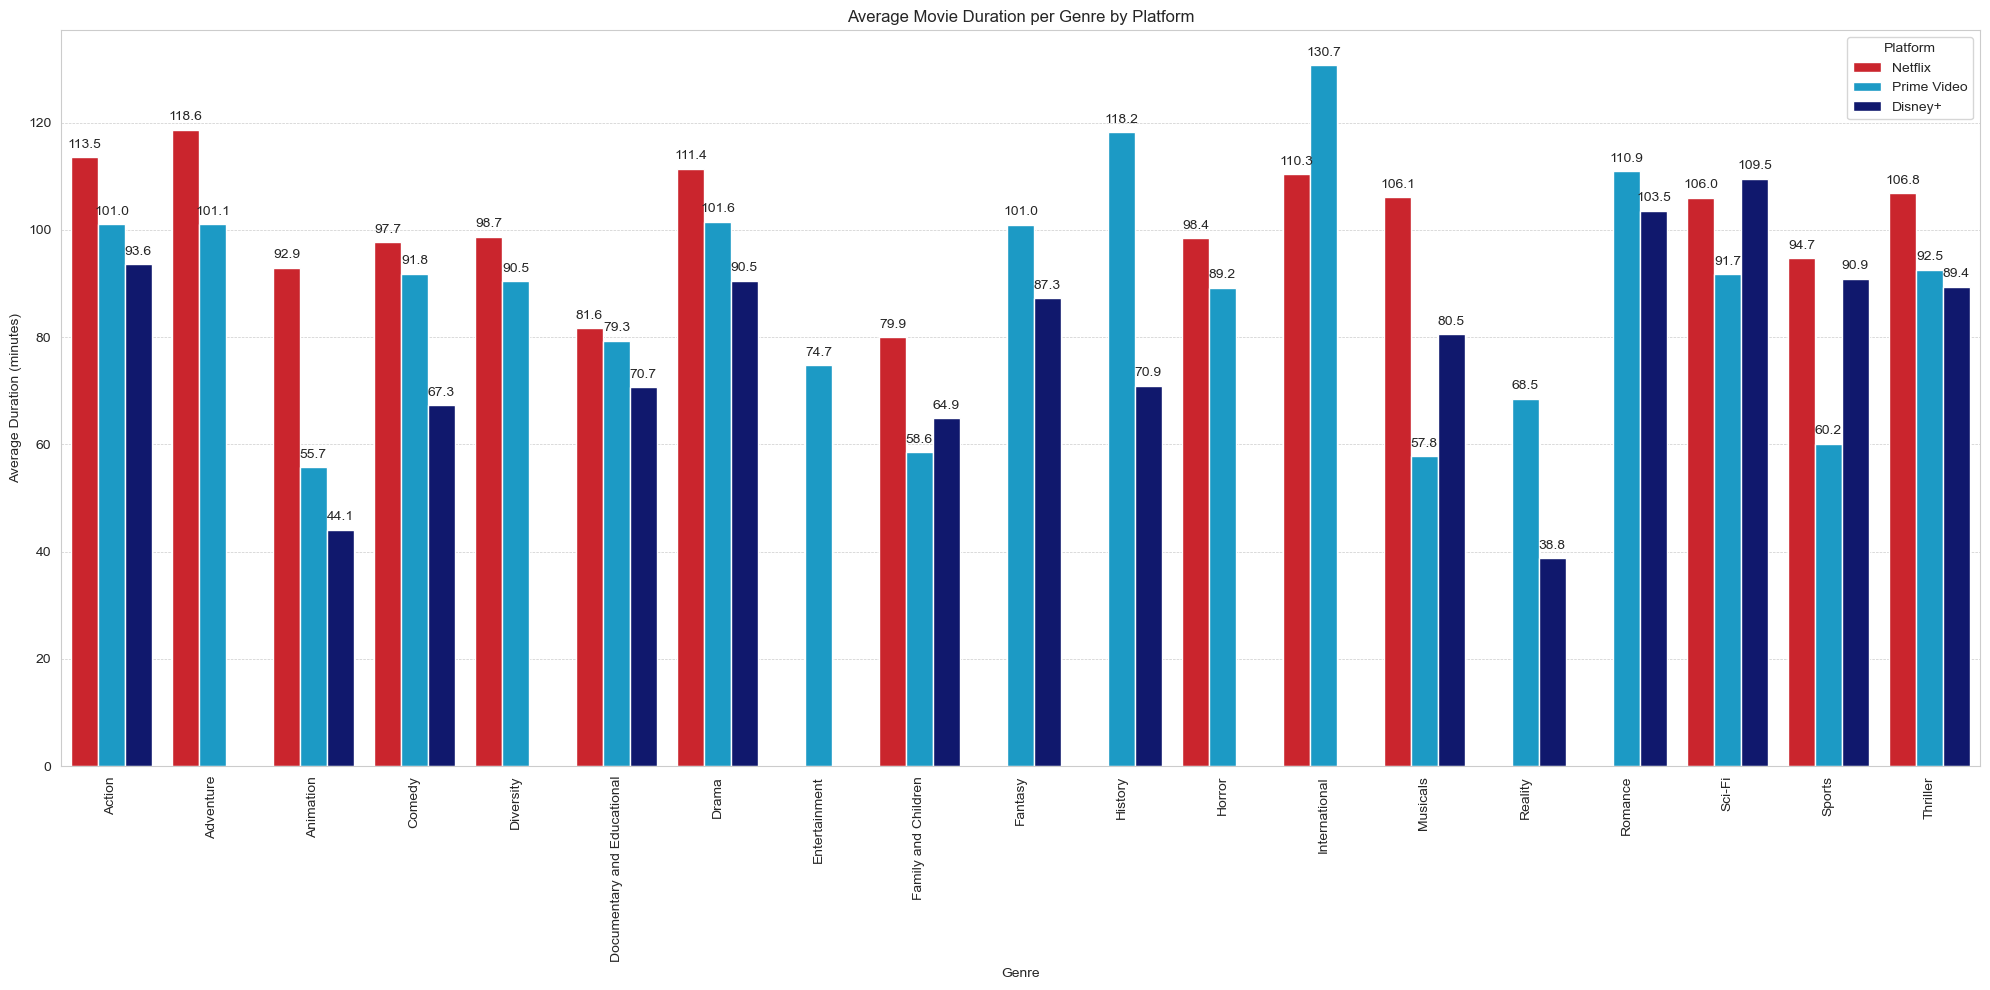

In [46]:
# Calculate average movie duration per genre for each platform
def calculate_avg_duration_per_genre(df):
    return df.groupby('genre')['duration_min'].mean()

netflix_avg_duration = calculate_avg_duration_per_genre(netflix_movies_df)
prime_video_avg_duration = calculate_avg_duration_per_genre(prime_video_movies_df)
disney_plus_avg_duration = calculate_avg_duration_per_genre(disney_plus_movies_df)

# Combine the averages into a single DataFrame
avg_durations = pd.DataFrame({
    'Netflix': netflix_avg_duration,
    'Prime Video': prime_video_avg_duration,
    'Disney+': disney_plus_avg_duration
}).reset_index()

# Melt the DataFrame for easier plotting with seaborn
avg_durations_melted = avg_durations.melt(id_vars='genre', var_name='Platform', value_name='Average Duration')

# Define the colors for each platform
platform_colors = {
    'Netflix': '#E50914',
    'Prime Video': '#00A8E1',
    'Disney+': '#000c7c'
}

# Plotting with the specified colors
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='genre', y='Average Duration', hue='Platform', data=avg_durations_melted, palette=platform_colors)
plt.xticks(rotation=90)
plt.title('Average Movie Duration per Genre by Platform')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

## Average revenue per movie duration

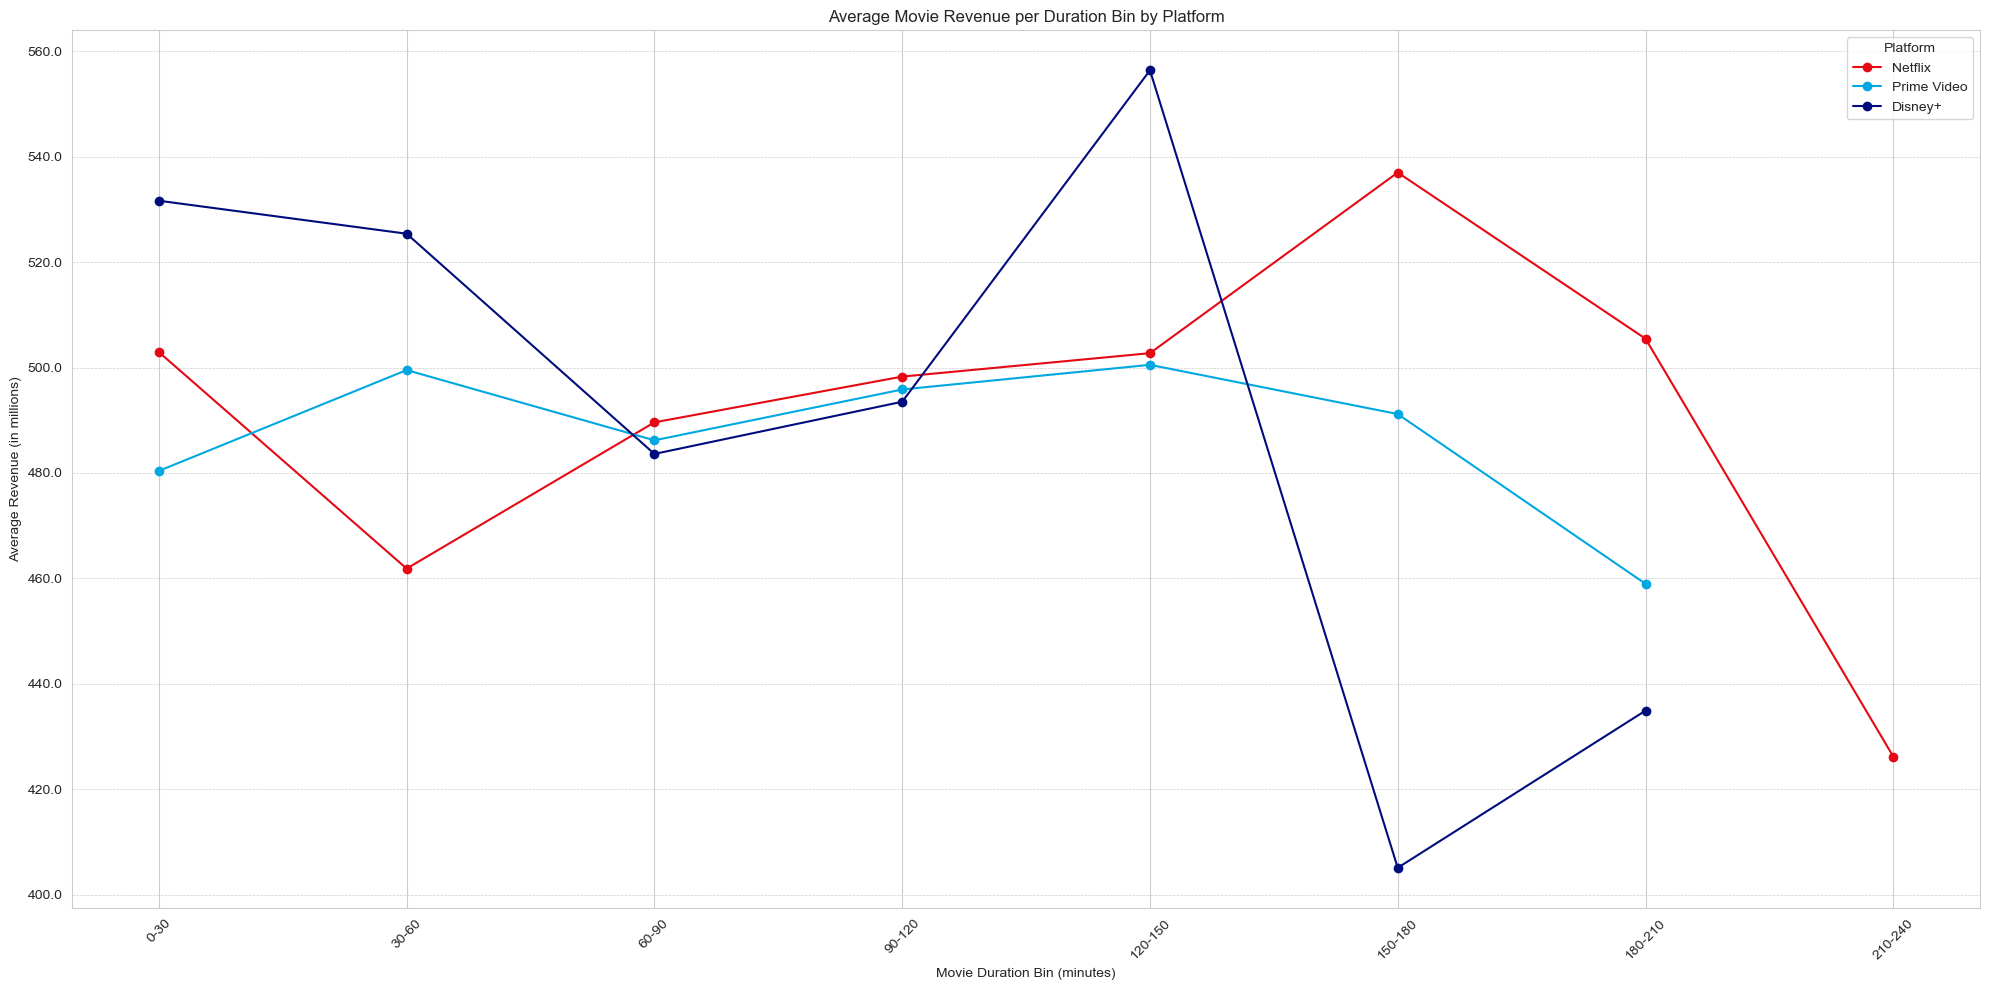

In [47]:
# Function to add duration bins and calculate average revenue
def process_df_for_plotting(df):
    df['duration_bin'] = pd.cut(df['duration_min'], bins=bins, labels=labels, right=False)
    # Note the addition of `observed=True` here to prevent the FutureWarning
    return df.groupby('duration_bin', observed=True)['revenue'].mean().reset_index()

# Define bins for movie durations
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240']

# Process each platform's DataFrame
netflix_data = process_df_for_plotting(netflix_movies_df)
prime_video_data = process_df_for_plotting(prime_video_movies_df)
disney_plus_data = process_df_for_plotting(disney_plus_movies_df)

# Define the colors for each platform
platform_colors = ['#E50914', '#00A8E1', '#000c7c']

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axis

# Plot for each platform
for i, platform_data in enumerate([netflix_data, prime_video_data, disney_plus_data]):
    plt.plot(platform_data['duration_bin'], platform_data['revenue'], label=['Netflix', 'Prime Video', 'Disney+'][i], color=platform_colors[i], marker='o')

plt.title('Average Movie Revenue per Duration Bin by Platform')
plt.xlabel('Movie Duration Bin (minutes)')

# Format the y-axis tick labels to show them in millions
scale_factor = 1e6  # for millions
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.1f}'.format(x / scale_factor) for x in ticks_loc])

# Set the y-axis label to indicate the units are in millions
plt.ylabel('Average Revenue (in millions)')

plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

## Total Revenue per Genre for each platform 

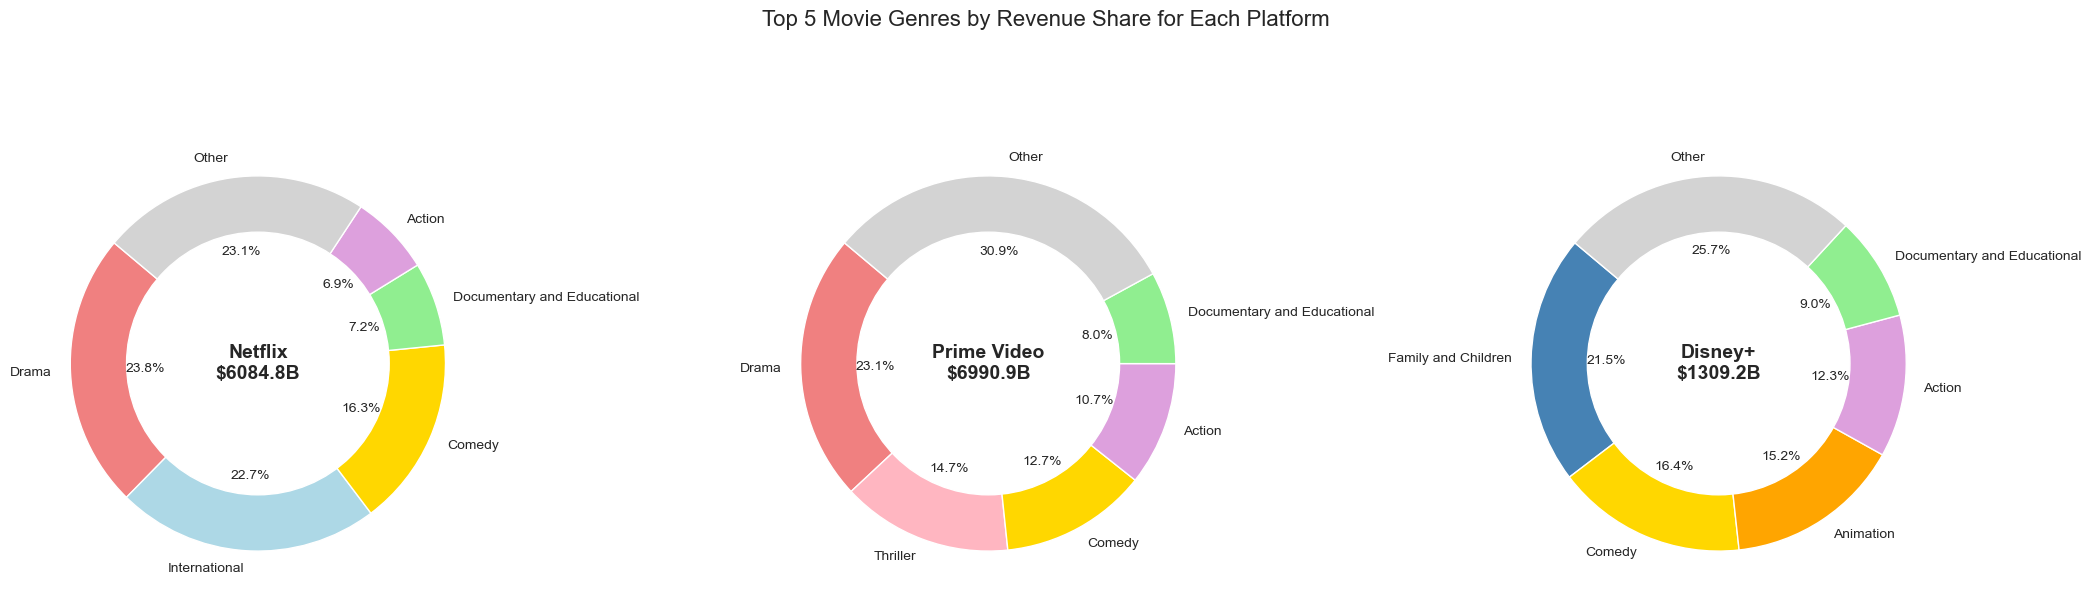

In [85]:
# Define the data preparation function
def prepare_pie_data(df, top_n=5):
    total_revenue = df.groupby('genre')['revenue'].sum().sort_values(ascending=False)
    top_genres = total_revenue.head(top_n)
    other_revenue = pd.Series(total_revenue.iloc[top_n:].sum(), index=['Other'])
    pie_data = pd.concat([top_genres, other_revenue], axis=0)
    return pie_data, total_revenue.sum()

# Prepare the data for pie charts
netflix_pie_data, netflix_total_revenue = prepare_pie_data(netflix_movies_df)
prime_video_pie_data, prime_video_total_revenue = prepare_pie_data(prime_video_movies_df)
disney_plus_pie_data, disney_plus_total_revenue = prepare_pie_data(disney_plus_movies_df)

# Generate a color palette for all unique genres across platforms
all_genres = netflix_pie_data.index.union(prime_video_pie_data.index).union(disney_plus_pie_data.index).drop('Other')
unique_colors = sns.color_palette('husl', n_colors=len(all_genres))
genre_colors = dict(zip(all_genres, unique_colors))
genre_colors['Other'] = 'lightgrey'  # Set a distinct color for 'Other'
genre_colors['Action'] = 'plum'  # Set a distinct color for 'Action
genre_colors['Comedy'] = 'gold'  # Set a distinct color for 'Adventure'
genre_colors['Documentary and Educational'] = 'lightgreen'  # Set a distinct color for 'Adventure'
genre_colors['International'] = 'lightblue'  # Set a distinct color for 'Adventure'
genre_colors['Drama'] = 'lightcoral'  # Set a distinct color for 'Adventure'
genre_colors['Thriller'] = 'lightpink'  # Set a distinct color for 'Adventure'
genre_colors['Animation'] = 'orange'  # Set a distinct color for 'Adventure'
genre_colors['Family and Children'] = 'steelblue'  # Set a distinct color for 'Adventure'

# Function to create a pie chart for each platform
def create_pie_chart(data, ax, platform, total_rev):
    data_labels = [f"{genre}" for genre, value in zip(data.index, data)]
    ax.pie(data, labels=data_labels, colors=[genre_colors[genre] for genre in data.index],
           autopct='%1.1f%%', startangle=140)
    # Center text
    ax.text(0, 0, f"{platform}\n${total_rev / 1e9:.1f}B", 
            ha='center', va='center', fontsize=14, fontweight='bold')
    # Donut chart
    centre_circle = plt.Circle((0,0), 0.70, color='white')
    ax.add_artist(centre_circle)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Create pie charts
create_pie_chart(netflix_pie_data/netflix_pie_data.sum(), axs[0], 'Netflix', netflix_total_revenue)
create_pie_chart(prime_video_pie_data/prime_video_pie_data.sum(), axs[1], 'Prime Video', prime_video_total_revenue)
create_pie_chart(disney_plus_pie_data/disney_plus_pie_data.sum(), axs[2], 'Disney+', disney_plus_total_revenue)

# Set a central title for the entire figure
fig.suptitle('Top 5 Movie Genres by Revenue Share for Each Platform', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the rect parameters to give space for the title
plt.show()


## Application GUI Prototype

In [89]:
def center_window(win):
    win.update_idletasks()
    width = win.winfo_width()
    frm_width = win.winfo_rootx() - win.winfo_x()
    win_width = width + 2 * frm_width
    height = win.winfo_height()
    titlebar_height = win.winfo_rooty() - win.winfo_y()
    win_height = height + titlebar_height + frm_width
    x = win.winfo_screenwidth() // 2 - win_width // 2
    y = win.winfo_screenheight() // 2 - win_height // 2
    win.geometry('{}x{}+{}+{}'.format(width, height, x, y))
    win.deiconify()

def display_logo():
    logo_path = '/Users/samer/Documents/github_repos/Cinemalytics/images/cinemalytics_nobackground.png'
    img = Image.open(logo_path)
    img = img.resize((100, 100), Image.Resampling.LANCZOS)
    logo_image = ImageTk.PhotoImage(img)
    logo_label = Label(app, image=logo_image)
    logo_label.image = logo_image
    logo_label.pack(pady=20)

def show_recommendation():
    clear_window()
    display_logo()
    tk.Label(app, text="Based on your criteria, we would recommend:", pady=10).pack(expand=True)
    for i in range(1, 4):
        tk.Label(app, text=f"{i}. Platform").pack()
    tk.Button(app, text="Back to Start page", command=welcome_window, padx=20, pady=10).pack(side=tk.LEFT, padx=(100, 10), pady=(10, 20))
    tk.Button(app, text="Close", command=app.destroy, padx=20, pady=10).pack(side=tk.RIGHT, padx=(10, 100), pady=(10, 20))

def input_window(content_type):
    clear_window()
    display_logo()
    tk.Label(app, text=content_type, pady=10).pack()
    tk.Label(app, text="Genre").pack()
    global genre_entry
    genre_entry = tk.Entry(app)
    genre_entry.pack()
    length_label_text = "Movie length (minutes)" if content_type == "Movies" else "Seasons"
    tk.Label(app, text=length_label_text).pack()
    global length_entry
    length_entry = tk.Entry(app)
    length_entry.pack()
    tk.Label(app, text="Rating (e.g., PG, PG-13)").pack()
    global rating_entry
    rating_entry = tk.Entry(app)
    rating_entry.pack()
    tk.Button(app, text="Enter", command=show_recommendation).pack(pady=20)

def content_selection_window():
    clear_window()
    display_logo()
    tk.Button(app, text="Movie?", command=lambda: input_window("Movies"), padx=20, pady=10).pack(pady=10)
    tk.Button(app, text="TV Show?", command=lambda: input_window("TV Shows"), padx=20, pady=10).pack(pady=10)

def welcome_window():
    clear_window()
    display_logo()
    tk.Label(app, text="Welcome to Cinemalytics!", pady=10).pack()
    tk.Button(app, text="Start", command=content_selection_window, padx=20, pady=10).pack()
    tk.Label(app, text="© 2024 Cinemalytics, Inc.", pady=10).pack(side=tk.BOTTOM)

def clear_window():
    for widget in app.winfo_children():
        widget.destroy()

def on_close():
    if messagebox.askokcancel("Quit", "Do you want to quit?"):
        app.destroy()

app = tk.Tk()
app.title("Cinemalytics - Platform Recommender")
app.geometry('400x400')
center_window(app)

app.protocol("WM_DELETE_WINDOW", on_close)  # Handle the window close event

welcome_window()
app.mainloop()


: 